# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import Packages

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## 3. Connect SQLite to Python

In [ ]:
# Connect to the database
conn = sqlite3.connect('retail_online_shop.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
rows = cursor.fetchall()

# Process the fetched data
for row in rows:
    print(row)

('bills',)
('brand_details',)
('main_categories',)
('sub_categories',)
('bill_items',)
('products',)
('bill_locations',)


## 4. Data Preparation Using SQL

In [ ]:
# Connect to the database
conn = sqlite3.connect('retail_online_shop.db')
cursor = conn.cursor()

# Joining Tables
cursor.execute("SELECT p.product_ID, p.product_name, p.brand_ID, b.brand_name \
                FROM products AS p \
                JOIN brand_details AS b ON p.brand_ID = b.brand_ID")
joined_tables = cursor.fetchall()

# Process the joined data
for row in joined_tables:
    product_ID = row[0]
    product_name = row[1]
    brand_ID = row[2]
    brand_name = row[3]
    print(f"Product ID: {product_ID}, Product Name: {product_name}, Brand ID: {brand_ID}, Brand Name: {brand_name}")

Product ID: 1, Product Name: 555, Brand ID: 531, Brand Name: 555
Product ID: 2, Product Name: 2-IN-1 DAY & NIGHT, Brand ID: 183, Brand Name: ENGAGE ON
Product ID: 3, Product Name: 3M SCOTCH BRITE GENERAL PURPOS, Brand ID: 347, Brand Name: SCOTCH BRITE
Product ID: 4, Product Name: 3M SCOTCH BRITE SCRUB SPONGE, Brand ID: 347, Brand Name: SCOTCH BRITE
Product ID: 5, Product Name: 3M SCOTCH BRITE STN STEEL SCRB, Brand ID: 347, Brand Name: SCOTCH BRITE
Product ID: 6, Product Name: 5 STAR, Brand ID: 71, Brand Name: 5 STAR
Product ID: 7, Product Name: 50-50 JEERA MASTI, Brand ID: 39, Brand Name: 50-50
Product ID: 8, Product Name: 50-50 MSK CK, Brand ID: 39, Brand Name: 50-50
Product ID: 9, Product Name: 50-50 REGULAR, Brand ID: 39, Brand Name: 50-50
Product ID: 10, Product Name: AACHI, Brand ID: 441, Brand Name: AACHI
Product ID: 11, Product Name: AACHI, Brand ID: 441, Brand Name: AACHI
Product ID: 12, Product Name: AADHAAR, Brand ID: 109, Brand Name: AADHAAR
Product ID: 13, Product Name: AAS

In [ ]:
# Read 'bills' table
bills_df = pd.read_sql_query("SELECT * FROM bills", conn)

# Read 'brand_details' table
brand_details_df = pd.read_sql_query("SELECT * FROM brand_details", conn)

# Read 'main_categories' table
main_categories_df = pd.read_sql_query("SELECT * FROM main_categories", conn)

# Read 'sub_categories' table
sub_categories_df = pd.read_sql_query("SELECT * FROM sub_categories", conn)

# Read 'bill_items' table
bill_items_df = pd.read_sql_query("SELECT * FROM bill_items", conn)

# Read 'products' table
products_df = pd.read_sql_query("SELECT * FROM products", conn)

# Read 'bill_locations' table
bill_locations_df = pd.read_sql_query("SELECT * FROM bill_locations", conn)

# Print the data from each table
print("Bills Table:")
print(bills_df.head())

print("\nBrand Details Table:")
print(brand_details_df.head())

print("\nMain Categories Table:")
print(main_categories_df.head())

print("\nSub Categories Table:")
print(sub_categories_df.head())

print("\nBill Items Table:")
print(bill_items_df.head())

print("\nProducts Table:")
print(products_df.head())

print("\nBill Locations Table:")
print(bill_locations_df.head())


Bills Table:
   index  bill_ID invoice   bill_date
0      0        1      T1  2020-01-01
1      1        2      T2  2020-01-01
2      2        3      T3  2020-01-01
3      3        4      T4  2020-01-01
4      4        5      T5  2020-01-01

Brand Details Table:
   index  brand_ID     brand_name                 company
0      0         1           AMUL               G C M M F
1      1         2         MELODY             PARLE PRODS
2      2         3  CADBURY SHOTS  MONDELEZ INTERNATIONAL
3      3         4     WAGH BAKRI      GUJ TEA PROCESSORS
4      4         5           TATA               TATA CHEM

Main Categories Table:
   index  category_ID             category_name
0      0            1       AFTER SHAVE LOTIONS
1      1            2    AGARBATTI & DHOOPBATTI
2      2            3  ALL AIR FRESHNERS(01/03)
3      3            4          ALL IODISED SALT
4      4            5                  ANTACIDS

Sub Categories Table:
   index  subcategory_ID     subcategory_name
0      0

In [ ]:
bills_df

,index,bill_ID,invoice,bill_date
0,0,1,T1,2020-01-01
1,1,2,T2,2020-01-01
2,2,3,T3,2020-01-01
3,3,4,T4,2020-01-01
4,4,5,T5,2020-01-01
...,...,...,...,...
2381,2381,2382,T3528,2020-01-31
2382,2382,2383,T3530,2020-01-31
2383,2383,2384,T3533,2020-01-31
2384,2384,2385,T3535,2020-01-31


In [ ]:
brand_details_df

,index,brand_ID,brand_name,company
0,0,1,AMUL,G C M M F
1,1,2,MELODY,PARLE PRODS
2,2,3,CADBURY SHOTS,MONDELEZ INTERNATIONAL
3,3,4,WAGH BAKRI,GUJ TEA PROCESSORS
4,4,5,TATA,TATA CHEM
...,...,...,...,...
536,536,537,MPS,MPS FOOD PRODUCTS
537,537,538,SURABHI,ADINATH AGRO
538,538,539,DRYFRUITS,H.P.NUTRITIONS
539,539,540,JIVANA,GODAWARI BIOREFINERIES


In [ ]:
main_categories_df

,index,category_ID,category_name
0,0,1,AFTER SHAVE LOTIONS
1,1,2,AGARBATTI & DHOOPBATTI
2,2,3,ALL AIR FRESHNERS(01/03)
3,3,4,ALL IODISED SALT
4,4,5,ANTACIDS
...,...,...,...
72,72,73,TOOTH POWDERS
73,73,74,TWIN BLADES
74,74,75,VANASPATI CONS PACK (8/94)
75,75,76,VERMICELLI & NOODLE


In [ ]:
sub_categories_df

,index,subcategory_ID,subcategory_name
0,0,1,AEROSOL
1,1,2,AEROSOLS
2,2,3,AFTER SHAVE LOTIONS
3,3,4,AGARBATTI
4,4,5,ALKALINE
...,...,...,...
155,155,156,VERMICILLI
156,156,157,WAFER CREAM
157,157,158,WASHING POWDERS/LIQUIDS
158,158,159,WAX POLISHES


In [ ]:
bill_items_df

,index,bill_item_ID,bill_ID,product_ID,quantity,selling_price,total_sales
0,0,1,1,1011,4.0,9.5,38.0
1,1,2,1,215,1.0,118.0,118.0
2,2,3,1,437,1.0,155.0,155.0
3,3,4,1,57,2.0,5.0,10.0
4,4,5,1,752,1.0,39.0,39.0
...,...,...,...,...,...,...,...
8349,8349,8311,2383,841,1.0,55.0,55.0
8350,8350,8312,2384,195,10.0,20.0,200.0
8351,8351,8313,2385,622,1.0,15.0,15.0
8352,8352,8314,2385,331,1.0,115.0,115.0


In [ ]:
products_df

,index,product_ID,product_name,brand_ID,category_ID,subcategory_ID
0,0,1,555,531,60,142
1,1,2,2-IN-1 DAY & NIGHT,183,31,53
2,2,3,3M SCOTCH BRITE GENERAL PURPOS,347,60,129
3,3,4,3M SCOTCH BRITE SCRUB SPONGE,347,60,130
4,4,5,3M SCOTCH BRITE STN STEEL SCRB,347,60,142
...,...,...,...,...,...,...
1027,1027,1028,YOLI YOLA,28,27,149
1028,1028,1029,Z MAGNETISM,366,69,147
1029,1029,1030,ZANDU,178,56,124
1030,1030,1031,ZOOPY,67,76,70


In [ ]:
bill_locations_df

,index,loc_ID,bill_ID,address,latitude,longitude,town/city,country
0,0,1,1,"11257 Reed Hartman Hwy Unit B Blue Ash, OH 452...",39.271805,-84.376292,Blue Ash,Ohio
1,1,2,2,"10221 State Line Rd Kansas City, MO 64114 US",38.943100,-94.607692,Kansas City,Missouri
2,2,3,3,"13127 State Line Rd Kansas City, MO 64145 US",38.888916,-94.607348,Kansas City,Missouri
3,3,4,4,"1370 Walnut St Kansas City, MO 64106 US",39.097368,-94.582474,Kansas City,Missouri
4,4,5,5,"1713 W 39th St Kansas City, MO 64111 US",39.057050,-94.605638,Kansas City,Missouri
...,...,...,...,...,...,...,...,...
2381,2381,2382,2382,"2391 N Highway 67 Florissant, MO 63033 US",38.804604,-90.308598,Florissant,Missouri
2382,2382,2383,2383,"12348 S US Highway 71 Grandview, MO 64030 US",38.902037,-94.525274,Grandview,Missouri
2383,2383,2384,2384,"18880 E Valley View Pkwy Independence, MO 6405...",39.033685,-94.357925,Independence,Missouri
2384,2384,2385,2385,"1400 Missouri Blvd Jefferson City, MO 65109 US",38.578819,-92.192711,Jefferson City,Missouri


## 5. Problem Statement

The dataset is stored in a database file, either in db or SQL format. This means that conducting Exploratory Data Analysis (EDA) requires additional effort compared to working with a single table. In this case, the dataset consists of multiple tables, each containing different pieces of information. To gain a comprehensive understanding of the data and make meaningful insights, it is necessary to perform table joins, which involve combining related information from different tables.

## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

In [ ]:
# Joining Tables
query = '''
SELECT b."index", b.*, bd.*, mc.*, sc.*, bi.*, p.*, bl.*
FROM bills AS b
JOIN brand_details AS bd ON b."index" = bd."index"
JOIN main_categories AS mc ON b."index" = mc."index"
JOIN sub_categories AS sc ON b."index" = sc."index"
JOIN bill_items AS bi ON b."index" = bi."index"
JOIN products AS p ON b."index" = p."index"
JOIN bill_locations AS bl ON b."index" = bl."index"
'''

# Read the joined data into a pandas DataFrame
joined_df = pd.read_sql_query(query, conn)

# Display the joined DataFrame
print(joined_df.head())

   index  index bill_ID invoice   bill_date  index  brand_ID     brand_name  \
0      0      0       1      T1  2020-01-01      0         1           AMUL   
1      1      1       2      T2  2020-01-01      1         2         MELODY   
2      2      2       3      T3  2020-01-01      2         3  CADBURY SHOTS   
3      3      3       4      T4  2020-01-01      3         4     WAGH BAKRI   
4      4      4       5      T5  2020-01-01      4         5           TATA   

                  company  index  ...  category_ID subcategory_ID  index  \
0               G C M M F      0  ...           60            142      0   
1             PARLE PRODS      1  ...           31             53      1   
2  MONDELEZ INTERNATIONAL      2  ...           60            129      2   
3      GUJ TEA PROCESSORS      3  ...           60            130      3   
4               TATA CHEM      4  ...           60            142      4   

   loc_ID bill_ID                                            address

In [ ]:
# Define the table names
table_names = ['bills', 'brand_details', 'main_categories', 'sub_categories', 'bill_items', 'products', 'bill_locations']

# Check for duplicate and missing values in each table
for table_name in table_names:
    # Read the table into a pandas DataFrame
    table_df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

    # Check for duplicate rows
    duplicate_rows = table_df[table_df.duplicated()]
    print(f"Duplicate Rows in {table_name}:")
    print(duplicate_rows)

    # Check for missing values
    missing_values = table_df.isnull().sum()
    print(f"Missing Values in {table_name}:")
    print(missing_values)
    print()

Duplicate Rows in bills:
Empty DataFrame
Columns: [index, bill_ID, invoice, bill_date]
Index: []
Missing Values in bills:
index        0
bill_ID      0
invoice      0
bill_date    0
dtype: int64

Duplicate Rows in brand_details:
Empty DataFrame
Columns: [index, brand_ID, brand_name, company]
Index: []
Missing Values in brand_details:
index         0
brand_ID      0
brand_name    0
company       0
dtype: int64

Duplicate Rows in main_categories:
Empty DataFrame
Columns: [index, category_ID, category_name]
Index: []
Missing Values in main_categories:
index            0
category_ID      0
category_name    0
dtype: int64

Duplicate Rows in sub_categories:
Empty DataFrame
Columns: [index, subcategory_ID, subcategory_name]
Index: []
Missing Values in sub_categories:
index               0
subcategory_ID      0
subcategory_name    0
dtype: int64

Duplicate Rows in bill_items:
Empty DataFrame
Columns: [index, bill_item_ID , bill_ID, product_ID, quantity, selling_price, total_sales]
Index: []
Mi

In [ ]:
# Read the 'bill_items' table into a pandas DataFrame
bill_items_df = pd.read_sql_query("SELECT * FROM bill_items", conn)

# Fill missing values with the mean value for each column
bill_items_df = bill_items_df.fillna(bill_items_df.mean())

# Print the updated DataFrame
print("Updated bill_items DataFrame:")
print(bill_items_df.head())

Updated bill_items DataFrame:
   index  bill_item_ID   bill_ID  product_ID  quantity  selling_price  \
0      0              1        1        1011       4.0            9.5   
1      1              2        1         215       1.0          118.0   
2      2              3        1         437       1.0          155.0   
3      3              4        1          57       2.0            5.0   
4      4              5        1         752       1.0           39.0   

   total_sales  
0         38.0  
1        118.0  
2        155.0  
3         10.0  
4         39.0  


In [ ]:
print(bill_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8354 entries, 0 to 8353
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8354 non-null   int64  
 1   bill_item_ID   8354 non-null   int64  
 2   bill_ID        8354 non-null   int64  
 3   product_ID     8354 non-null   int64  
 4   quantity       8354 non-null   float64
 5   selling_price  8354 non-null   float64
 6   total_sales    8354 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 457.0 KB
None


In [ ]:
# Define the table names
table_names = ['bills', 'brand_details', 'main_categories', 'sub_categories', 'bill_items', 'products', 'bill_locations']

# Iterate over each table and print the data information
for table_name in table_names:
    # Read the table into a pandas DataFrame
    table_df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

    # Print the data information
    print(f"Data Information of {table_name}:")
    print(table_df.info())
    print()

Data Information of bills:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      2386 non-null   int64 
 1   bill_ID    2386 non-null   int64 
 2   invoice    2386 non-null   object
 3   bill_date  2386 non-null   object
dtypes: int64(2), object(2)
memory usage: 74.7+ KB
None

Data Information of brand_details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       541 non-null    int64 
 1   brand_ID    541 non-null    int64 
 2   brand_name  541 non-null    object
 3   company     541 non-null    object
dtypes: int64(2), object(2)
memory usage: 17.0+ KB
None

Data Information of main_categories:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 

In [ ]:
# Read Table 'bills'
bills_df = pd.read_sql_query("SELECT * FROM bills", conn)

# Change type data of 'bill_date' to datetime
bills_df['bill_date'] = pd.to_datetime(bills_df['bill_date'])

# Save change to database
bills_df.to_sql('bills', conn, if_exists='replace', index=False)

2386

In [ ]:
# Print the results
print("The result after change the typedata of 'bill_date':")
print(bills_df.info())

The result after change the typedata of 'bill_date':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      2386 non-null   int64         
 1   bill_ID    2386 non-null   int64         
 2   invoice    2386 non-null   object        
 3   bill_date  2386 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 74.7+ KB
None


In [ ]:
# Define the table names
table_names = ['bills', 'brand_details', 'main_categories', 'sub_categories', 'bill_items', 'products', 'bill_locations']

# Find outliers in each table
for table_name in table_names:
    # Read the table into a pandas DataFrame
    table_df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

    # Iterate over each column and find outliers
    for column in table_df.columns:
        if table_df[column].dtype in [np.int64, np.float64]:  # Only numeric columns
            Q1 = table_df[column].quantile(0.25)
            Q3 = table_df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the outlier thresholds
            lower_threshold = Q1 - 1.5 * IQR
            upper_threshold = Q3 + 1.5 * IQR

            # Find the outliers
            outliers = table_df[(table_df[column] < lower_threshold) | (table_df[column] > upper_threshold)]

            # Print the outliers
            if not outliers.empty:
                print(f"Outliers in {column} of {table_name}:")
                print(outliers)
                print()

Outliers in quantity of bill_items:
      index  bill_item_ID   bill_ID  product_ID  quantity  selling_price  \
0         0              1        1        1011       4.0            9.5   
15       15             13        2         931       5.0          115.0   
17       17             15        2         195      13.0            5.0   
27       27             25        3         898       6.0            9.5   
32       32             30        4         893       4.0           29.0   
...     ...            ...      ...         ...       ...            ...   
8342   8342           8304     2378         716     100.0            2.0   
8343   8343           8305     2378          50       4.0           30.0   
8345   8345           8307     2380         662       6.0           20.0   
8347   8347           8309     2381         342       7.0          175.0   
8350   8350           8312     2384         195      10.0           20.0   

      total_sales  
0            38.0  
15         

## 7. Exploratory Data Analysis & Visualization

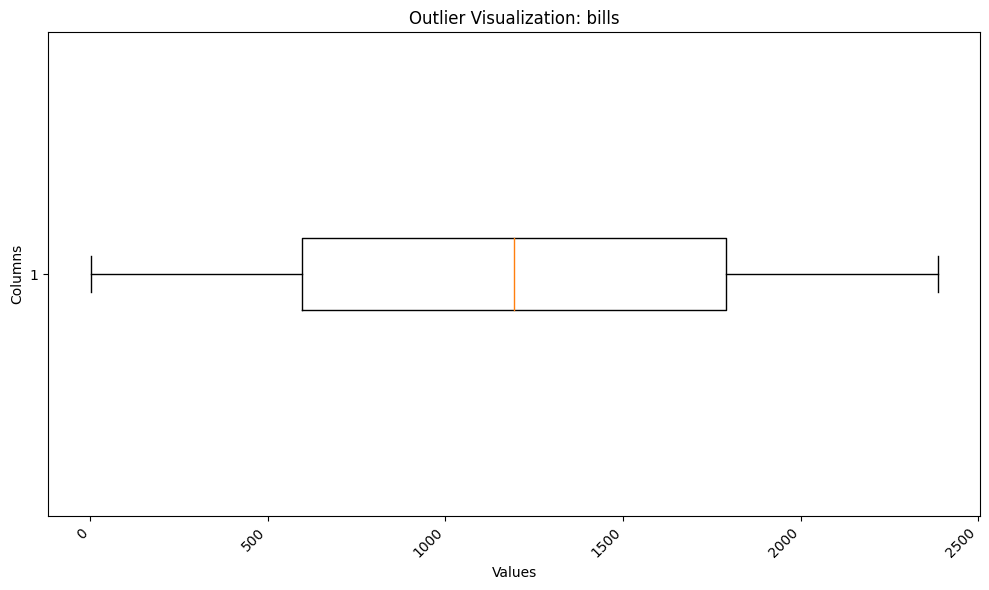

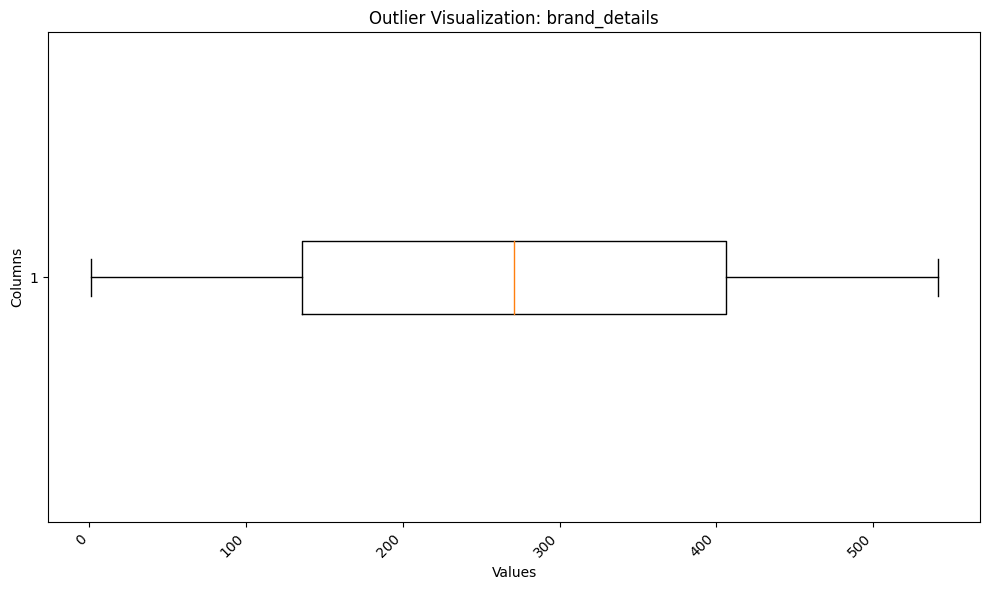

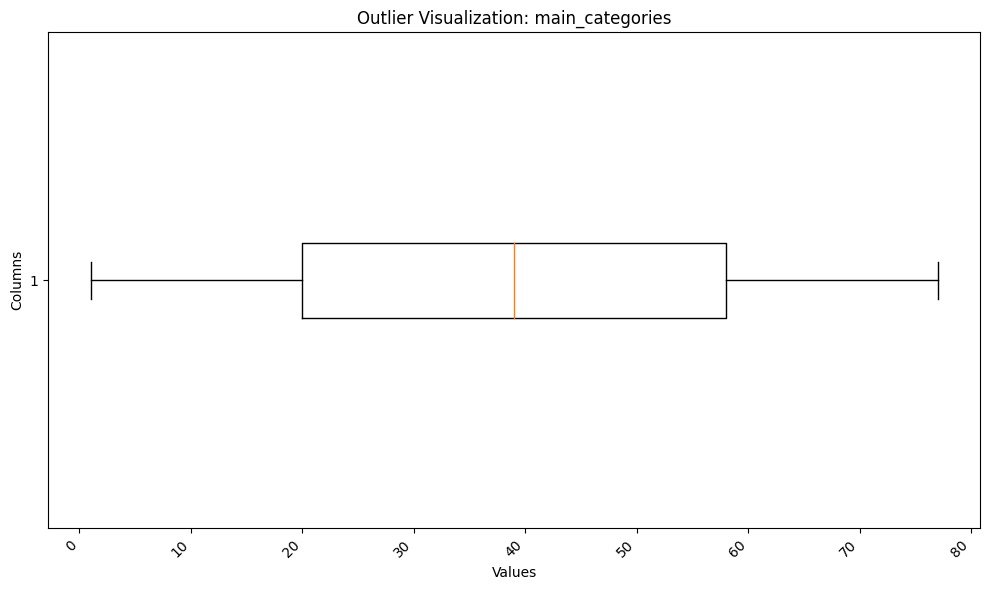

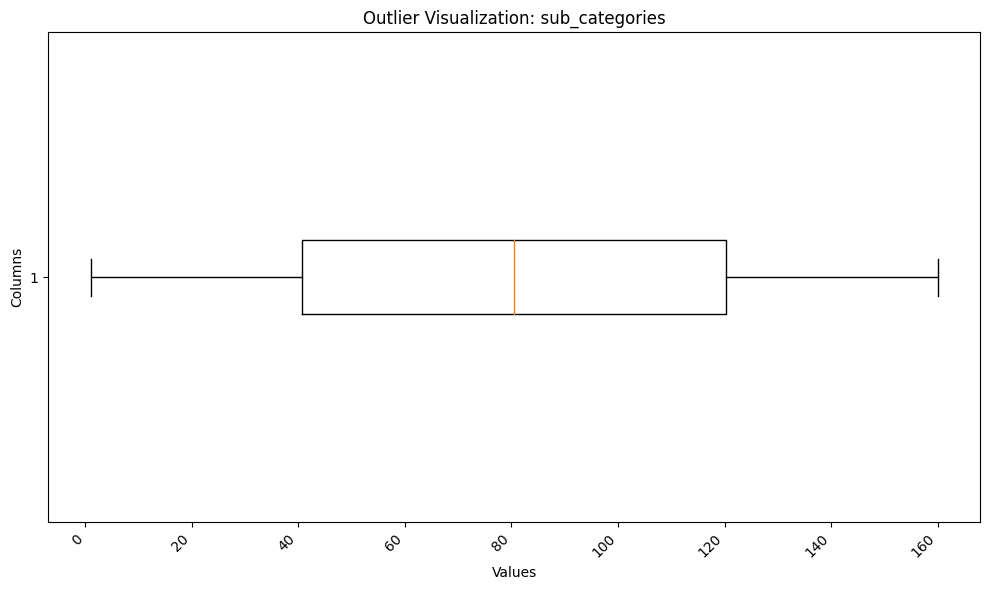

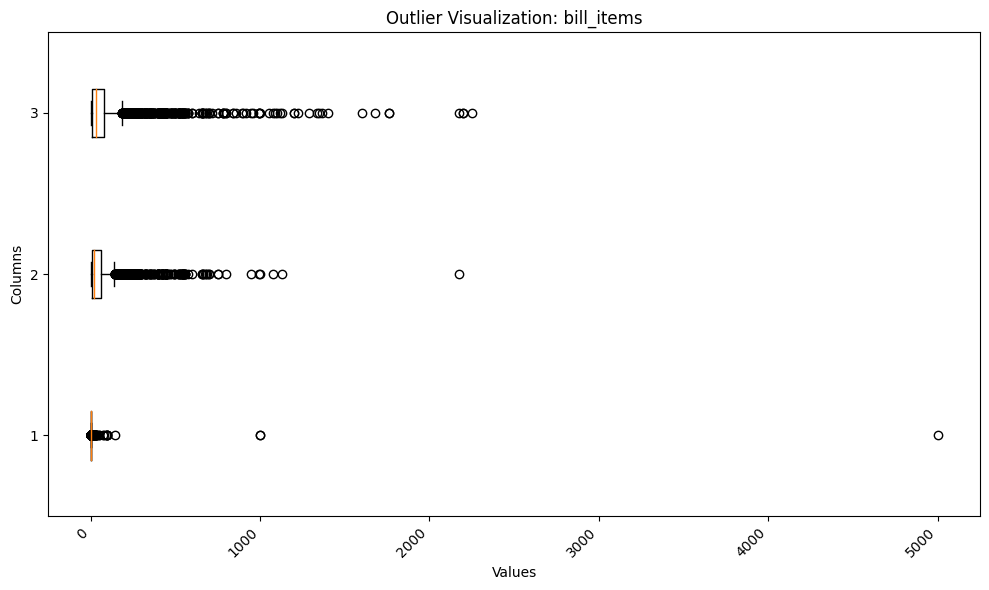

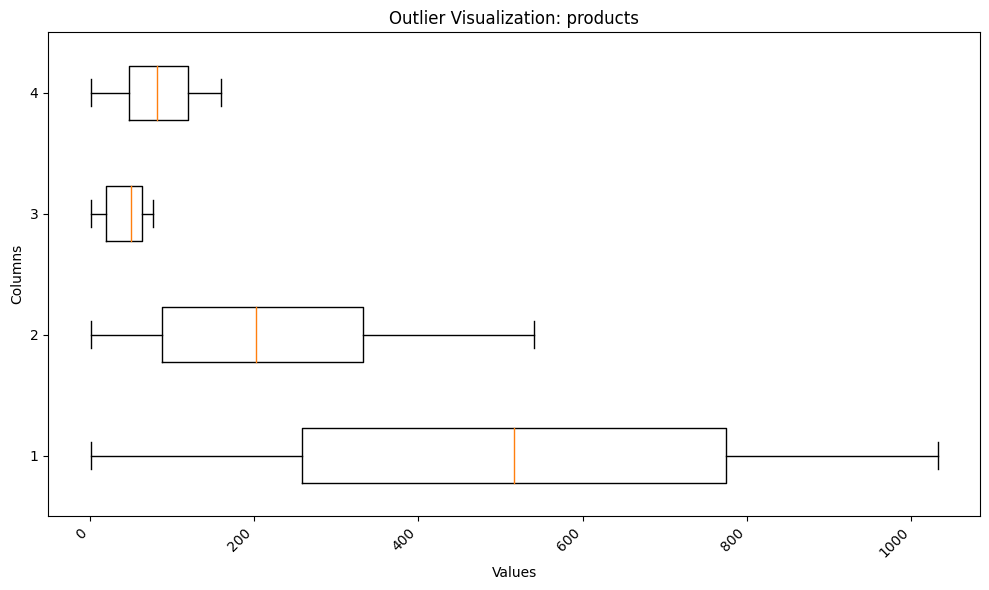

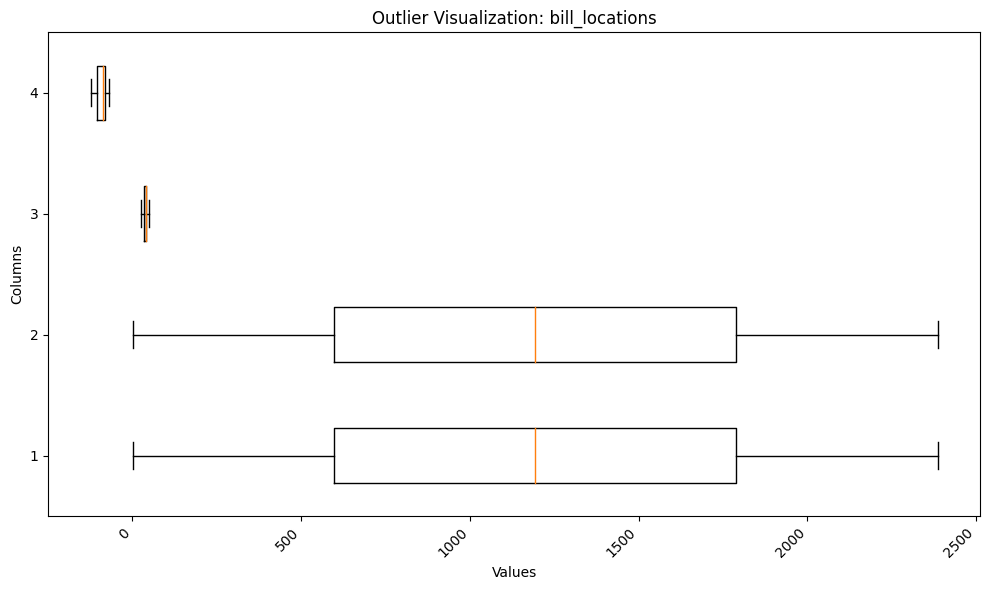

In [ ]:
# Specify the columns to visualize outliers
columns = {
    'bills': ['bill_ID'],
    'brand_details': ['brand_ID'],
    'main_categories': ['category_ID'],
    'sub_categories': ['subcategory_ID'],
    'bill_items': ['quantity', 'selling_price', 'total_sales'],
    'products': ['product_ID', 'brand_ID', 'category_ID', 'subcategory_ID'],
    'bill_locations': ['loc_ID', 'bill_ID', 'latitude', 'longitude']
}

# Create box plots for each table
for table, cols in columns.items():
    # Create a DataFrame for the current table
    df = eval(f'{table}_df')

    # Create a subplot for the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[cols].values, vert=False)
    plt.title(f'Outlier Visualization: {table}')
    plt.xlabel('Values')
    plt.ylabel('Columns')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

In [ ]:
# Remove outliers based on visualization
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers and update the DataFrames
for table, cols in columns.items():
    df = eval(f'{table}_df')
    for col in cols:
        df = remove_outliers(df, col)
    exec(f'{table}_df = df')

In [ ]:
# Remove outliers and update the DataFrames
for table, cols in columns.items():
    df = eval(f'{table}_df')
    for col in cols:
        df = remove_outliers(df, col)
    exec(f'{table}_df = df')
    print(f"Updated DataFrame for {table}:")
    print(df)
    print('\n')

Updated DataFrame for bills:
      index  bill_ID invoice  bill_date
0         0        1      T1 2020-01-01
1         1        2      T2 2020-01-01
2         2        3      T3 2020-01-01
3         3        4      T4 2020-01-01
4         4        5      T5 2020-01-01
...     ...      ...     ...        ...
2381   2381     2382   T3528 2020-01-31
2382   2382     2383   T3530 2020-01-31
2383   2383     2384   T3533 2020-01-31
2384   2384     2385   T3535 2020-01-31
2385   2385     2386   T3536 2020-01-31

[2386 rows x 4 columns]


Updated DataFrame for brand_details:
     index  brand_ID     brand_name                    company
0        0         1           AMUL                  G C M M F
1        1         2         MELODY                PARLE PRODS
2        2         3  CADBURY SHOTS     MONDELEZ INTERNATIONAL
3        3         4     WAGH BAKRI         GUJ TEA PROCESSORS
4        4         5           TATA                  TATA CHEM
..     ...       ...            ...              

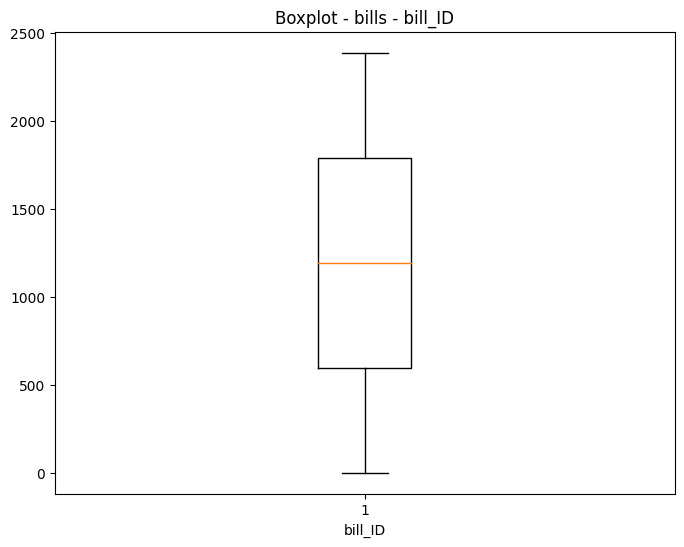

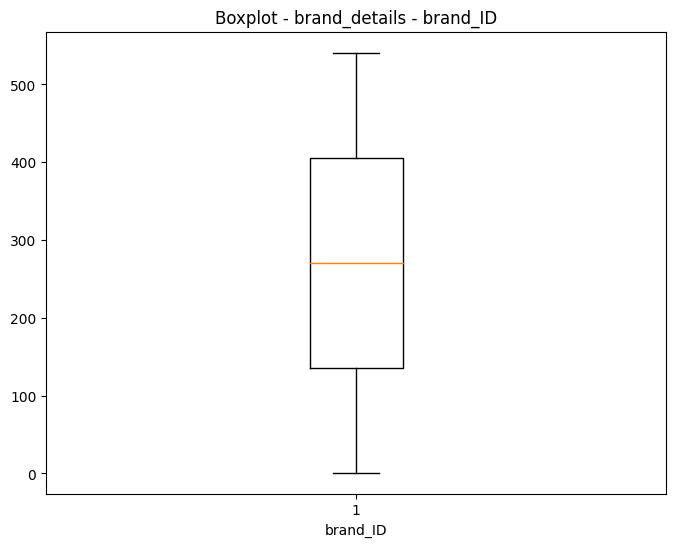

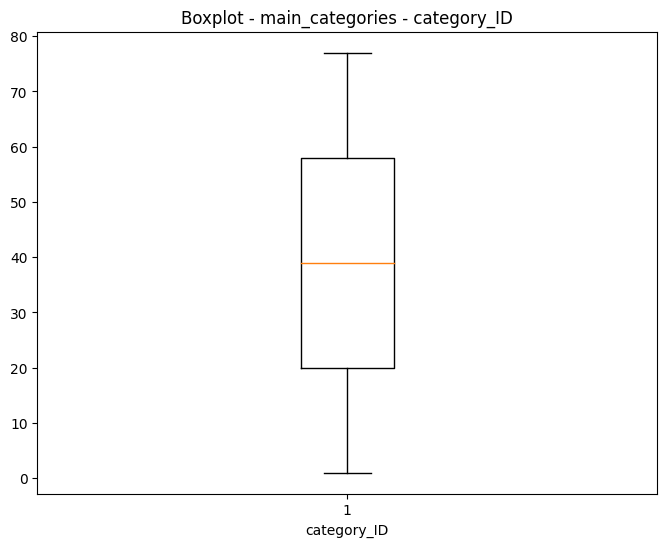

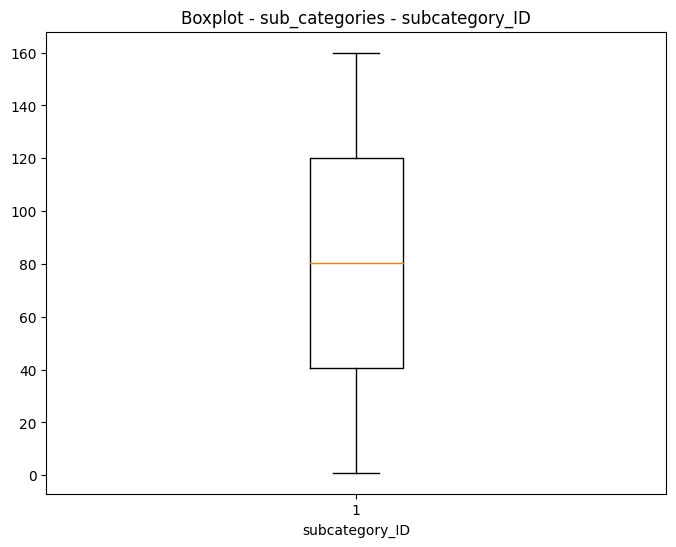

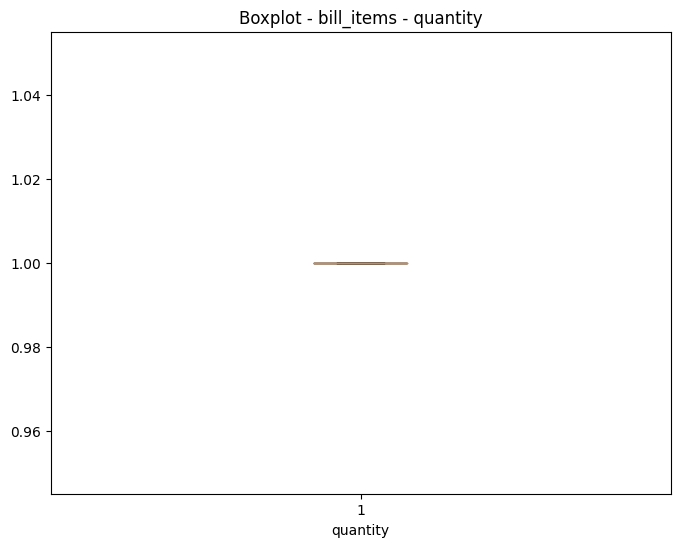

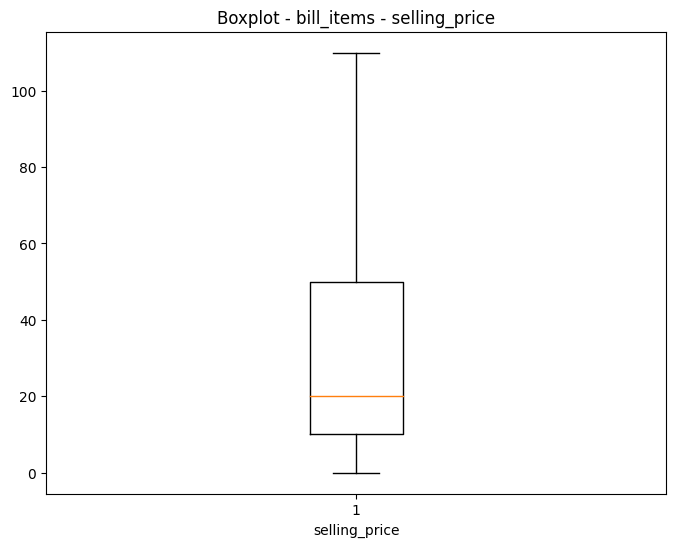

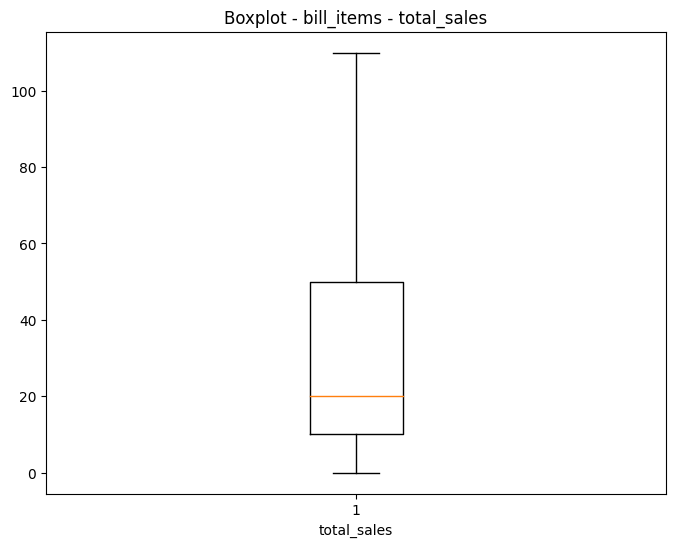

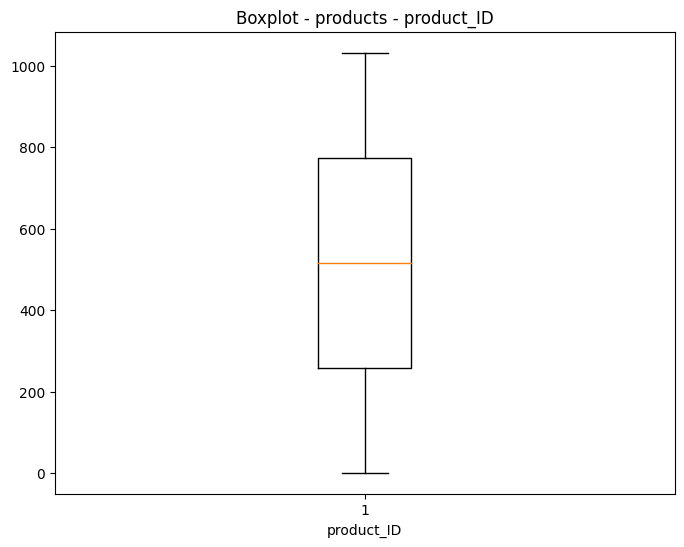

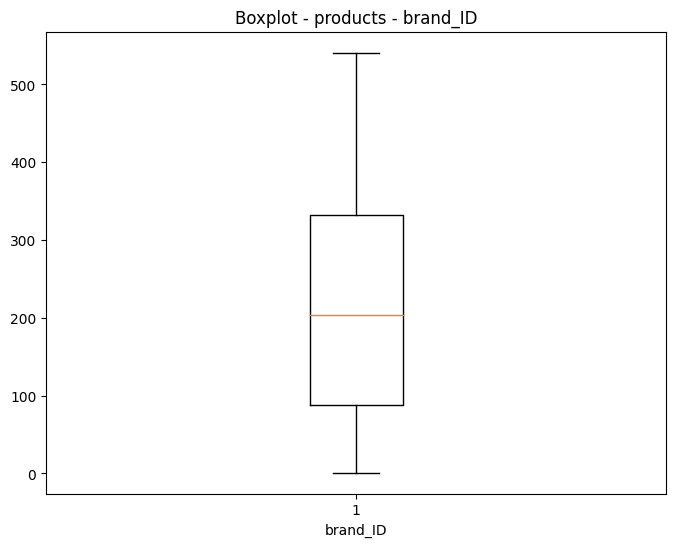

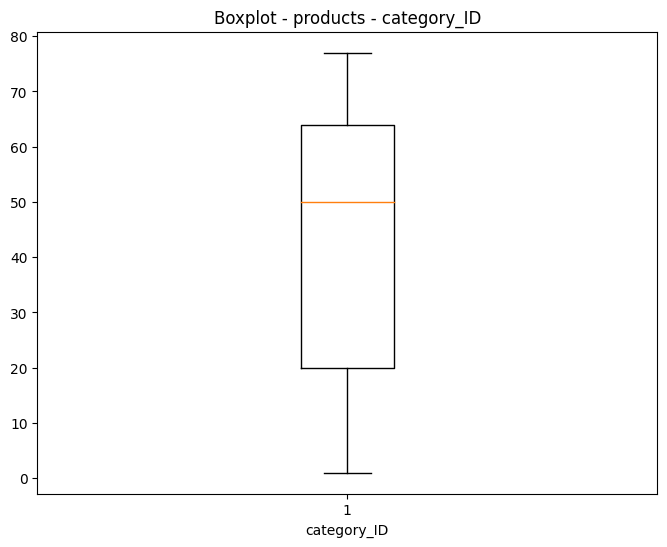

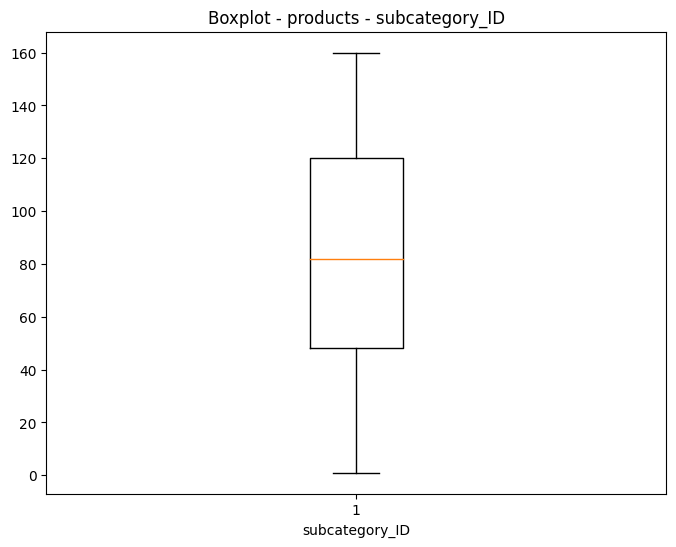

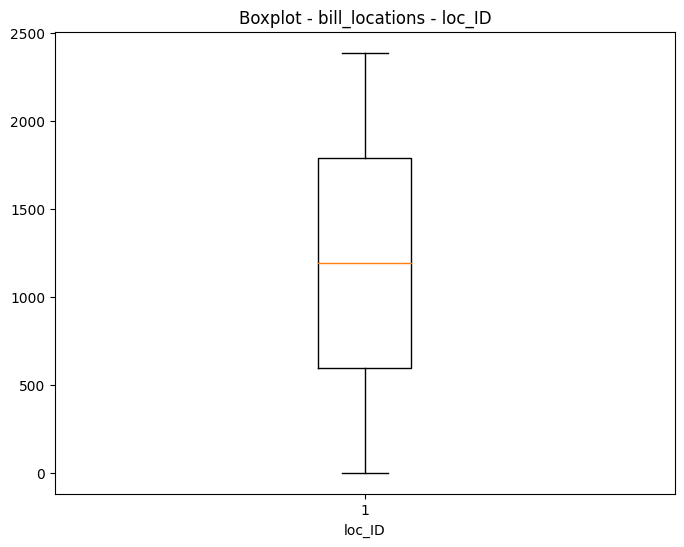

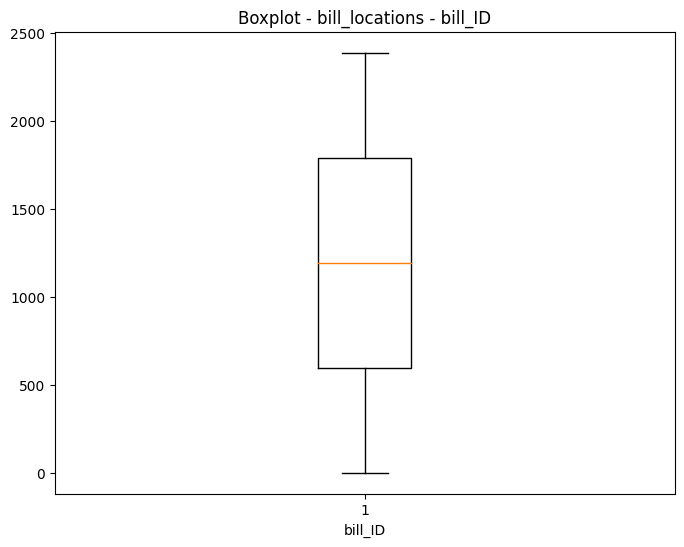

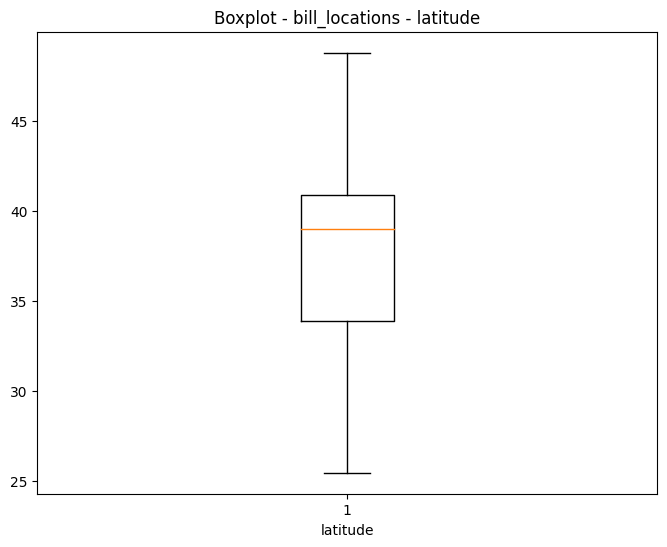

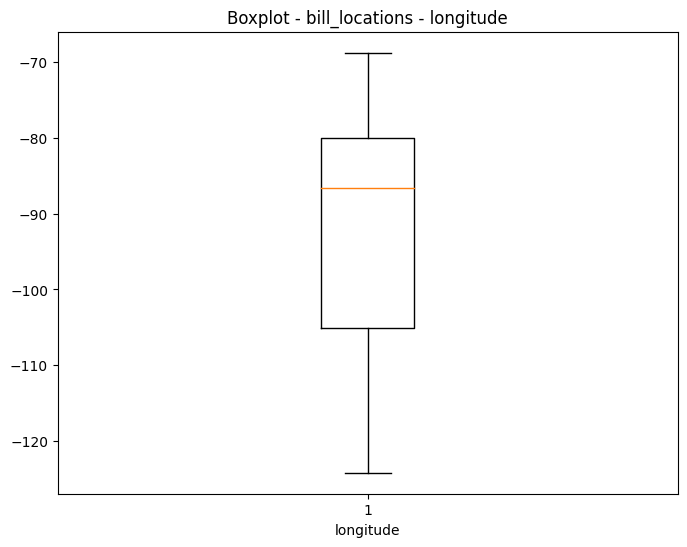

In [ ]:
# Visualize outliers using box plots
for table, cols in columns.items():
    df = eval(f'{table}_df')
    for col in cols:
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.title(f'Boxplot - {table} - {col}')
        plt.show()

In [ ]:
# Menghitung total penjualan produk
product_sales = bill_items_df.groupby('product_ID')['quantity'].sum().reset_index()
print(product_sales)

     product_ID  quantity
0             1       1.0
1             2       1.0
2             3      10.0
3             4       3.0
4             5       5.0
..          ...       ...
782        1028      10.0
783        1029       1.0
784        1030       5.0
785        1031       1.0
786        1032      13.0

[787 rows x 2 columns]


In [ ]:
# Mengurutkan produk berdasarkan total penjualan secara menurun
most_popular_products = product_sales.sort_values('quantity', ascending=False)
print(most_popular_products)

     product_ID  quantity
145         195     130.0
434         588     121.0
646         866     105.0
189         252      97.0
419         567      95.0
..          ...       ...
273         369       1.0
552         740       1.0
551         739       1.0
550         738       1.0
0             1       1.0

[787 rows x 2 columns]


In [ ]:
# Mendapatkan ID produk yang paling digemari
most_popular_product_id = most_popular_products.iloc[0]['product_ID']
print(most_popular_product_id)

195.0


In [ ]:
# Mendapatkan informasi produk yang paling digemari
most_popular_product = products_df[products_df['product_ID'] == most_popular_product_id]
print(most_popular_product)

     index  product_ID product_name  brand_ID  category_ID  subcategory_ID
194    194         195   DAIRY MILK         6           15              88


In [ ]:
#Menampilkan produk yang paling digemari
print("The most popular product:")
print(most_popular_product[['product_name', 'brand_ID', 'category_ID', 'subcategory_ID']])

The most popular product:
    product_name  brand_ID  category_ID  subcategory_ID
194   DAIRY MILK         6           15              88


In [ ]:
product_locations = bill_locations_df.merge(bill_items_df, on='bill_ID').merge(products_df, on='product_ID')
print(product_locations)

      index_x  loc_ID  bill_ID  \
0           0       1        1   
1         265     266      266   
2         457     458      458   
3        1346    1347     1347   
4        1485    1486     1486   
...       ...     ...      ...   
5156     2328    2329     2329   
5157     2363    2364     2364   
5158     2365    2366     2366   
5159     2367    2368     2368   
5160     2384    2385     2385   

                                                address   latitude  \
0     11257 Reed Hartman Hwy Unit B Blue Ash, OH 452...  39.271805   
1                3349 Monroe Ave Rochester, NY 14618 US  43.101336   
2     11 W Washington St Suite 140 Phoenix, AZ 85003 US  33.448061   
3             6821 Collier Blvd 101 Naples, FL 34114 US  26.065774   
4       1745 Peachtree St NE Ste H Atlanta, GA 30309 US  33.801616   
...                                                 ...        ...   
5156            7750 Main St N Maple Grove, MN 55369 US  45.095669   
5157  925 County Road E E Ste 1

In [ ]:
product_location_sales = product_locations[product_locations['product_ID'] == most_popular_product_id].groupby('town/city')['quantity'].sum().reset_index()
print("\nThe Region Distribution:")
print(product_location_sales)


The Region Distribution:
            town/city  quantity
0             Alameda       1.0
1            Alhambra       1.0
2         Aliso Viejo       1.0
3                Ames       1.0
4           Annapolis       1.0
..                ...       ...
99    West Bloomfield       1.0
100  West Springfield       1.0
101        Wilmington       1.0
102        Windermere       1.0
103         Woodhaven       1.0

[104 rows x 2 columns]


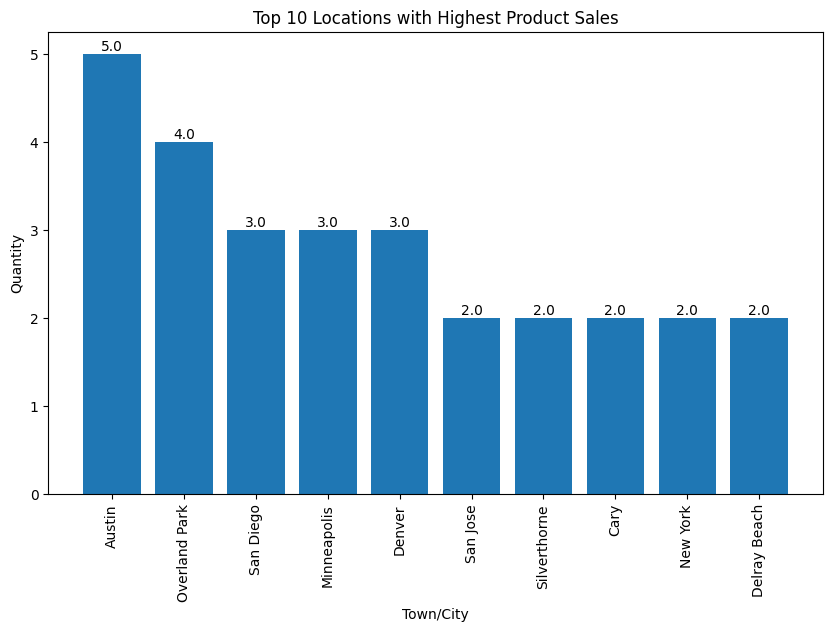

In [ ]:
# Sort the product_location_sales DataFrame by quantity in descending order and take the top 10
top_locations = product_location_sales.sort_values('quantity', ascending=False).head(10)

# Plotting the top 10 locations with the highest product sales and quantity
plt.figure(figsize=(10, 6))
plt.bar(top_locations['town/city'], top_locations['quantity'])
plt.xlabel('Town/City')
plt.ylabel('Quantity')
plt.title('Top 10 Locations with Highest Product Sales')
plt.xticks(rotation=90)

# Add quantity as text on top of each bar
for i, row in top_locations.iterrows():
    plt.text(row['town/city'], row['quantity'], str(row['quantity']), ha='center', va='bottom')

plt.show()

In [ ]:
# Menggabungkan tabel berdasarkan kunci-kunci yang sesuai
merged_df = bills_df.merge(bill_items_df, on='bill_ID')
merged_df = merged_df.merge(bill_locations_df, on='bill_ID')
merged_df = merged_df.merge(products_df, on='product_ID')

# Menghitung total penjualan per wilayah
region_sales = merged_df.groupby('town/city')['total_sales'].sum().reset_index()

# Mengurutkan wilayah berdasarkan total penjualan secara descending
sorted_region_sales = region_sales.sort_values(by='total_sales', ascending=False)

# Menampilkan wilayah top contributor
top_contributor = sorted_region_sales.iloc[0]['town/city']
print("Wilayah top contributor terhadap penjualan retail: ", top_contributor)

Wilayah top contributor terhadap penjualan retail:  New York


<ipython-input-35-85b055373bf7>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(products_df, on='product_ID')


<ipython-input-36-19334ea68394>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(products_df, on='product_ID')


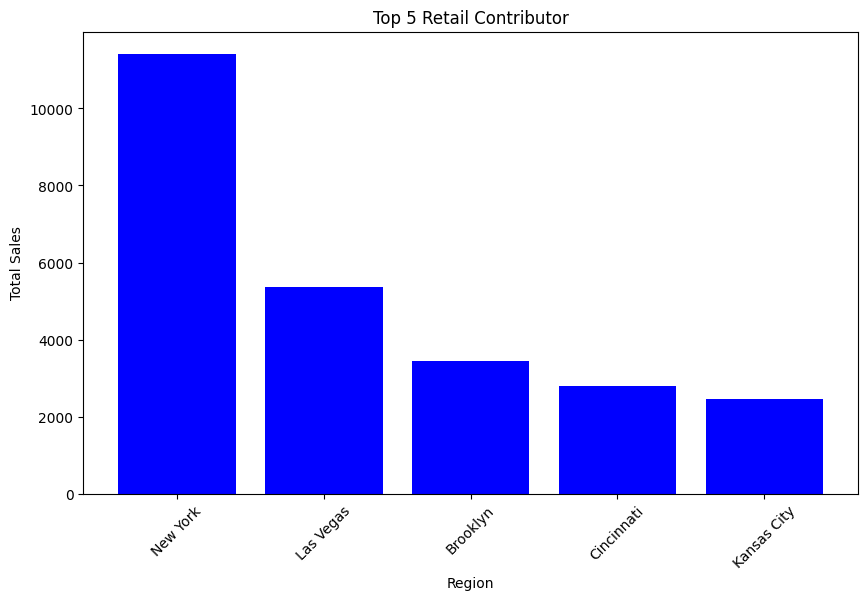


Top 5 Retail Contributor:
       town/city   total_sales
687     New York  11419.250000
518    Las Vegas   5362.500000
125     Brooklyn   3438.250000
177   Cincinnati   2805.000000
475  Kansas City   2468.484413


In [ ]:
import matplotlib.pyplot as plt

# Menggabungkan tabel berdasarkan kunci-kunci yang sesuai
merged_df = bills_df.merge(bill_items_df, on='bill_ID')
merged_df = merged_df.merge(bill_locations_df, on='bill_ID')
merged_df = merged_df.merge(products_df, on='product_ID')

# Menghitung total penjualan per wilayah
region_sales = merged_df.groupby('town/city')['total_sales'].sum().reset_index()

# Mengurutkan wilayah berdasarkan total penjualan secara descending
sorted_region_sales = region_sales.sort_values(by='total_sales', ascending=False)

# Mengambil top 5 wilayah top contributor
top_contributors = sorted_region_sales.head(5)

# Menampilkan visualisasi bar chart top 5 wilayah top contributor
plt.figure(figsize=(10, 6))
plt.bar(top_contributors['town/city'], top_contributors['total_sales'], color='blue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Top 5 Retail Contributor')
plt.xticks(rotation=45)
plt.show()

# Menampilkan wilayah top contributor dan jumlah penjualannya
print("\nTop 5 Retail Contributor:")
print(top_contributors)

In [ ]:
# Query and retrieve the data from the tables
df_bills = pd.read_sql_query("SELECT * FROM bills", conn)
df_brand_details = pd.read_sql_query("SELECT * FROM brand_details", conn)
df_main_categories = pd.read_sql_query("SELECT * FROM main_categories", conn)
df_sub_categories = pd.read_sql_query("SELECT * FROM sub_categories", conn)
df_bill_items = pd.read_sql_query("SELECT * FROM bill_items", conn)
df_products = pd.read_sql_query("SELECT * FROM products", conn)
df_bill_locations = pd.read_sql_query("SELECT * FROM bill_locations", conn)

# Save the dataframes to CSV
# Save 'bills' table
df_bills.to_csv('bills.csv', index=False)

# Save 'brand_details' table
df_brand_details.to_csv('brand_details.csv', index=False)

# Save 'main_categories' table
df_main_categories.to_csv('main_categories.csv', index=False)

# Save 'sub_categories' table
df_sub_categories.to_csv('sub_categories.csv', index=False)

# Save 'bill_items' table
df_bill_items.to_csv('bill_items.csv', index=False)

# Save 'products' table
df_products.to_csv('products.csv', index=False)

# Save 'bill_locations' table
df_bill_locations.to_csv('bill_locations.csv', index=False)

In [ ]:
import os

tables = {
    'bills': bills_df,
    'brand_details': brand_details_df,
    'main_categories': main_categories_df,
    'sub_categories': sub_categories_df,
    'bill_items': bill_items_df,
    'products': products_df,
    'bill_locations': bill_locations_df
}

output_dir = 'output'  # Specify the directory to save the CSV files

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save each table to a separate CSV file
for table, df in tables.items():
    filename = os.path.join(output_dir, f'{table}.csv')
    df.to_csv(filename, index=False)
    print(f'Saved {table} table to {filename}')

Saved bills table to output/bills.csv
Saved brand_details table to output/brand_details.csv
Saved main_categories table to output/main_categories.csv
Saved sub_categories table to output/sub_categories.csv
Saved bill_items table to output/bill_items.csv
Saved products table to output/products.csv
Saved bill_locations table to output/bill_locations.csv


## 8. Recommend

1.   Improve website user experience: Focus on enhancing the website's user interface, navigation, and overall user experience. Optimize page load speed, ensure mobile responsiveness, and simplify the checkout process to provide a seamless and enjoyable shopping experience for customers.

2. Implement personalized marketing strategies: Leverage customer data to create personalized marketing campaigns. Utilize techniques like targeted email marketing, personalized recommendations, and customized promotions based on customer preferences and purchase history.

3. Enhance inventory management: Implement an efficient inventory management system to ensure adequate stock levels, minimize out-of-stock situations, and optimize replenishment processes. Utilize data analytics to forecast demand, identify popular products, and streamline inventory operations.

4. Expand product assortment: Analyze market trends and customer preferences to identify product gaps and opportunities. Introduce new products or expand the existing product range to cater to a wider customer base and meet evolving customer demands.

5. Strengthen customer engagement: Foster a strong relationship with customers by implementing loyalty programs, offering exclusive discounts, and providing excellent customer service. Encourage customer feedback and reviews to improve brand reputation and build trust with potential customers.

6. Leverage social media and digital marketing: Establish a strong online presence through social media platforms and digital marketing campaigns. Engage with customers, share valuable content, run targeted ads, and leverage influencers to increase brand awareness and attract new customers.

7. Monitor and analyze customer metrics: Continuously track and analyze key customer metrics such as customer lifetime value, customer retention rate, and customer acquisition cost. Use these insights to refine marketing strategies, identify high-value customers, and optimize customer acquisition and retention efforts.

8. Explore partnerships and collaborations: Identify potential partnerships or collaborations with complementary brands or influencers to expand reach and attract new customers. Consider joint promotions, co-branded campaigns, or affiliate programs to leverage shared audiences and increase brand exposure.

9. Embrace omnichannel retailing: Offer a seamless shopping experience across multiple channels, including online, mobile, and brick-and-mortar stores. Implement strategies like click-and-collect, in-store pickup, or same-day delivery to provide flexibility and convenience to customers.

10. Monitor industry trends and competitors: Stay updated on industry trends, new technologies, and competitor strategies. Regularly analyze competitor pricing, promotions, and customer experiences to identify areas for improvement and stay competitive in the market.



## 9. Conclusion - Create the story

The dataset reveals significant patterns in the online retail shop's performance across different towns and cities, shedding light on key aspects of its market presence. Here's a narrative description derived from the provided data

In conclusion, it is evident that products falling under the category of food and beverages (such as bread, cookies, tea, etc) have garnered high market demand and captured the interest of the public in the USA, resulting in soaring sales figures. This phenomenon underscores the heightened consumer appetite for food-related goods, surpassing other categories and products.

This trend can be observed notably in cities like New York, where the populace demonstrates the highest purchasing affinity towards "Society Leaf," a tea product. Additionally, Hindustan Unilever Limited emerges as the predominant company in terms of product sales in New York, with Everest securing its position as the most sought-after brand in the region. Furthermore, when examining the broader perspective, food products originating from India have emerged as the top-selling items in the United States, with the biscuit category notably gaining substantial traction among the American populace.

In essence, the allure of food and beverage items, coupled with strategic marketing and brand recognition, has translated into impressive sales figures and consumer engagement in the United States market. This trend underscores the pivotal role that culinary preferences play in shaping market dynamics and consumer behavior, highlighting the pronounced significance of the food industry within the broader spectrum of consumer goods.